# Predicción de la longitud del sépalo en función de la longitud del pétalo ...

In [385]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
session = tf.Session()
iris = datasets.load_iris()

In [386]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

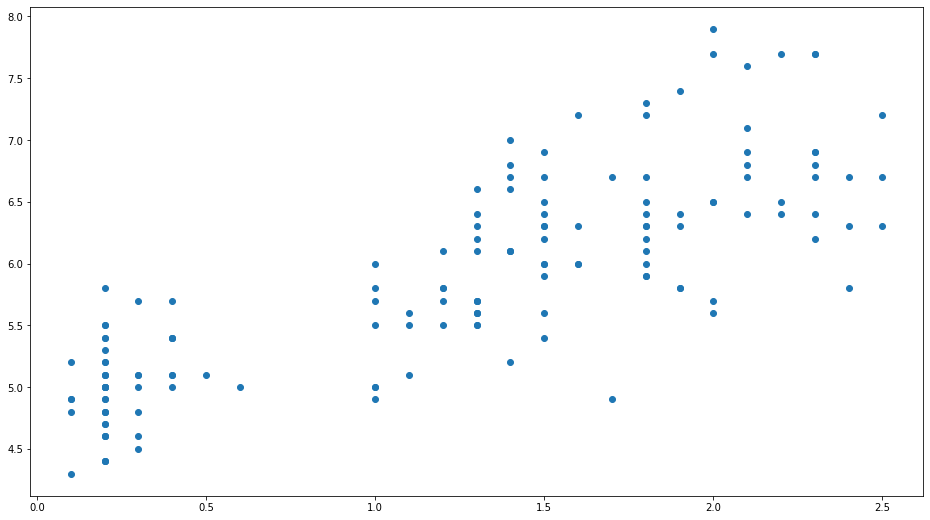

In [387]:
plt.figure(figsize = (16, 9))
plt.plot(x_vals, y_vals, "o", label = "Datos")
plt.show()

In [388]:
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [1, 1]))
b = tf.Variable(tf.random_normal(shape = [1, 1]))

$$y = Ax + b$$

In [389]:
y_predict = tf.add(tf.matmul(x_data, A), b)

In [390]:
loss = tf.reduce_mean(tf.square(y_target - y_predict))
my_optim = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
train_step = my_optim.minimize(loss)
init = tf.global_variables_initializer()
session.run(init)

In [391]:
loss_vect = []
for i in range(100):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss, feed_dict = {x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    if (i + 1) % 10 == 0:
        print("Paso # " + str(i + 1) + ", A = " + str(session.run(A)) + ", b = " + str(session.run(b)) + ", Loss = " + str(temp_loss))

Paso # 10, A = [[2.3245902]], b = [[2.3096116]], Loss = 1.4045784
Paso # 20, A = [[2.1529188]], b = [[2.8390782]], Loss = 1.5445915
Paso # 30, A = [[1.8719374]], b = [[3.2289715]], Loss = 0.80858445
Paso # 40, A = [[1.6977636]], b = [[3.5252001]], Loss = 0.6821578
Paso # 50, A = [[1.6042947]], b = [[3.7584596]], Loss = 0.4166611
Paso # 60, A = [[1.485778]], b = [[3.967997]], Loss = 0.59989434
Paso # 70, A = [[1.3570276]], b = [[4.09371]], Loss = 0.336887
Paso # 80, A = [[1.2450335]], b = [[4.208607]], Loss = 0.30444977
Paso # 90, A = [[1.1974024]], b = [[4.308857]], Loss = 0.27727923
Paso # 100, A = [[1.1692739]], b = [[4.420389]], Loss = 0.35099748


In [392]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)

In [393]:
print(str(slope) + "x + " + str(intercept))

1.1692739x + 4.420389


In [394]:
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + intercept)

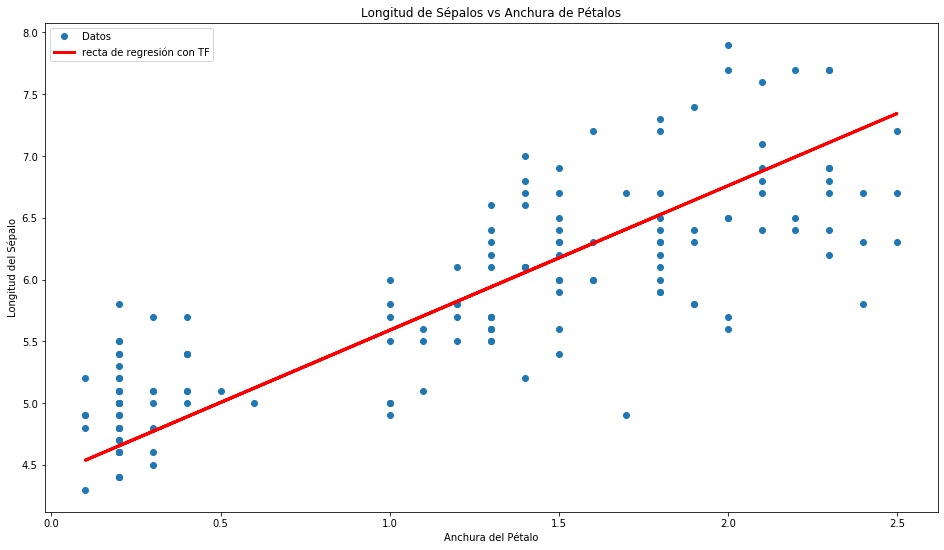

In [395]:
plt.figure(figsize = (16, 9))
plt.plot(x_vals, y_vals, "o", label = "Datos")
plt.plot(x_vals, best_fit, "r-", label = "recta de regresión con TF", linewidth = 3)
plt.legend(loc = "upper left")
plt.title("Longitud de Sépalos vs Anchura de Pétalos")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.show()

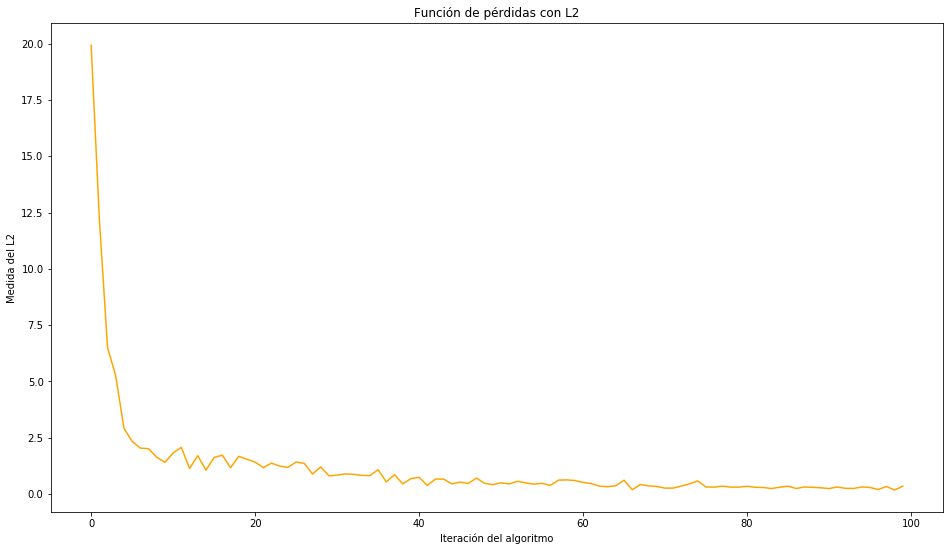

In [396]:
plt.figure(figsize = (16, 9))
plt.plot(loss_vect, "k", color = "orange")
plt.title("Función de pérdidas con L2")
plt.xlabel("Iteración del algoritmo")
plt.ylabel("Medida del L2")
plt.show()

In [397]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [398]:
x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [1, 1]))
b = tf.Variable(tf.random_normal(shape = [1, 1]))

In [399]:
y_predict = tf.add(tf.matmul(x_data, A), b)

In [400]:
loss_l1 = tf.reduce_mean(tf.abs(y_target - y_predict))
my_optim = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
train_step = my_optim.minimize(loss_l1)
init = tf.global_variables_initializer()
session.run(init)

In [401]:
loss_vect_l1 = []
for i in range(100):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss_l1, feed_dict = {x_data: rand_x, y_target: rand_y})
    loss_vect_l1.append(temp_loss)
    if (i + 1) % 10 == 0:
        print("Paso # " + str(i + 1) + ", A = " + str(session.run(A)) + ", b = " + str(session.run(b)) + ", Loss = " + str(temp_loss))

Paso # 10, A = [[1.6419946]], b = [[0.48073122]], Loss = 3.5884342
Paso # 20, A = [[2.2503948]], b = [[0.9767313]], Loss = 1.8331507
Paso # 30, A = [[2.6475952]], b = [[1.3807313]], Loss = 1.7259032
Paso # 40, A = [[2.702195]], b = [[1.6207312]], Loss = 1.6932538
Paso # 50, A = [[2.7055948]], b = [[1.8287312]], Loss = 1.1713016
Paso # 60, A = [[2.6281946]], b = [[1.9887311]], Loss = 1.4216337
Paso # 70, A = [[2.5833943]], b = [[2.156731]], Loss = 1.4527135
Paso # 80, A = [[2.513194]], b = [[2.3287308]], Loss = 1.0994513
Paso # 90, A = [[2.356594]], b = [[2.4247308]], Loss = 0.9861612
Paso # 100, A = [[2.2965941]], b = [[2.6047306]], Loss = 0.9772903


In [402]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)
print(str(slope) + "x + " + str(intercept))

2.2965941x + 2.6047306


In [403]:
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + intercept)

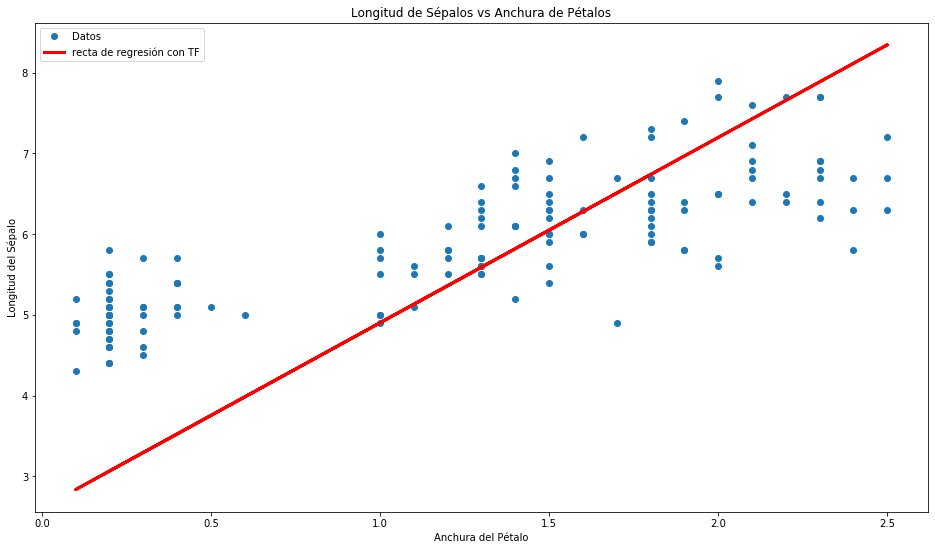

In [404]:
plt.figure(figsize = (16, 9))
plt.plot(x_vals, y_vals, "o", label = "Datos")
plt.plot(x_vals, best_fit, "r-", label = "recta de regresión con TF", linewidth = 3)
plt.legend(loc = "upper left")
plt.title("Longitud de Sépalos vs Anchura de Pétalos")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.show()

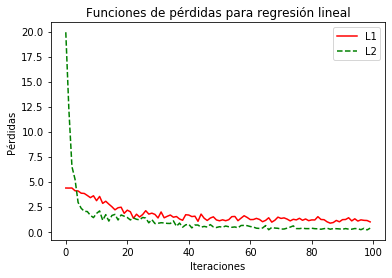

In [405]:
plt.plot(loss_vect_l1, "r-", label = "L1")
plt.plot(loss_vect, "g--", label = "L2")
plt.title("Funciones de pérdidas para regresión lineal")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdidas")
plt.legend(loc = "upper right")
plt.show()